<a href="https://colab.research.google.com/github/mayuri021203/MNIST-digit-image-classification-using-CNN/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.8539 - loss: 0.4557 - val_accuracy: 0.9816 - val_loss: 0.0585
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9875 - val_loss: 0.0412
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9877 - loss: 0.0378 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9917 - val_loss: 0.0244
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9885 - val_loss: 0.0358
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9847 - loss: 0.0489
Test accuracy: 98.85%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Prediction for first test image: 4


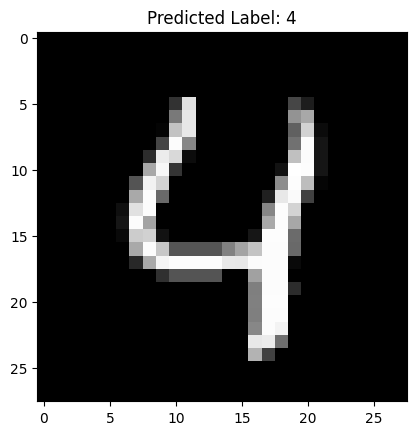

In [4]:
#import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# preprocessing: Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape the images to (28, 28, 1) as they are grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build the CNN model
model = models.Sequential()

# first convolutional + pooling layer
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

# second convolutional + pooling layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# third convolutional layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# flatten + dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels,
          epochs=5, batch_size=64,
          validation_data=(test_images, test_labels))

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# make predictions on test images
predictions = model.predict(test_images)
print(f"Prediction for first test image: {np.argmax(predictions[4])}")

# show first test image with prediction
plt.imshow(test_images[4].reshape(28,28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[4])}")
plt.show()
